In [ ]:
import numpy as np
import matplotlib.pyplot  as plt

In [ ]:
x = np.linspace(0.0001, 1, 200)

In [ ]:
logx = np.log(x)

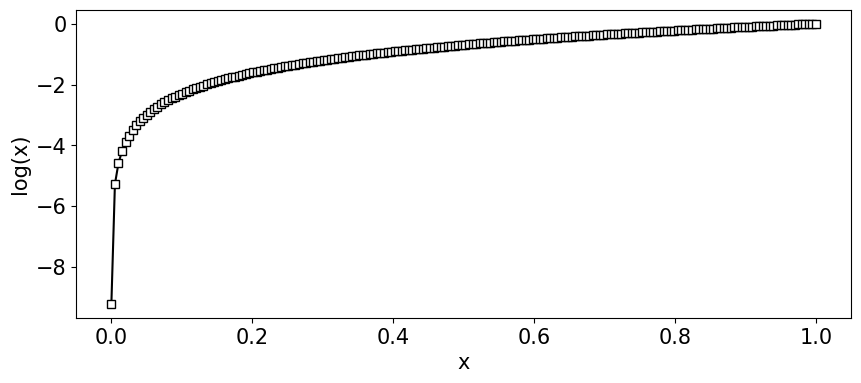

In [ ]:
fig = plt.figure(figsize = (10, 4))
plt.rcParams.update({'font.size': 15})
plt.plot(x, logx, 'ks-', markerfacecolor = 'w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

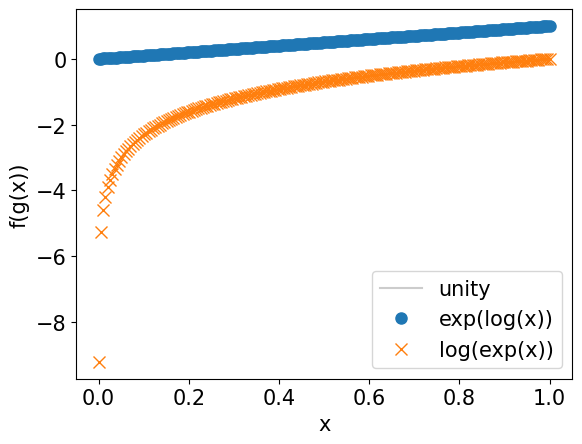

In [ ]:
# reverse the log
expx = np.exp(logx)

# to plot
plt.plot(x, x, color=[.8, .8, .8])
plt.plot(x,np.exp(logx), 'o', markersize = 8)
plt.plot(x, np.log(expx), 'x', markersize = 8)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity', 'exp(log(x))', 'log(exp(x))'])
plt.show()


In [ ]:
# calculate entropy and cross-entropy
import numpy as np
import matplotlib.pyplot as plt
import torch

H(p) = - '$sigma$'p(x)log(p(x))

In [ ]:
# the probability of an event happening
p = 0.25
# not hte correct formaula
H = -(p*np.log(p))
print('Wrong entropy: '+str(H))

# correct entropy, the even not happening prob is 0.75
q = 1- p

probs = [0.25, 0.75]
H = 0
for prob in probs:
  H += -prob * np.log(prob)

print('The correct entropy: '+str(H))

Wrong entropy: 0.34657359027997264
The correct entropy: 0.5623351446188083


In [ ]:
# Binary cross entropy (2 even loss function)
H = -(p*np.log(p) + (1-p)*np.log(1-p))

In [ ]:
#

5.23 Mean and Variance

In [ ]:
import numpy

In [ ]:
x = [1, 2, 4, 6, 5, 4, 0]

In [ ]:
n = len(x)

In [ ]:
mean1 = np.mean(x)
mean2 = np.sum(x) / n

In [ ]:
mean1, mean2

(3.142857142857143, 3.142857142857143)

In [ ]:
var1 = np.var(x) # biased variance
var2 = np.sum((x - mean1)**2) / (n-1)

In [ ]:
var1, var2

(4.122448979591836, 4.809523809523809)

In [ ]:
var1 = np.var(x, ddof=1) # unbiased variance, define the degree of freedom
var1

4.809523809523809

5.24 Random sampling and sampling variability

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = [1, 2, 4, 6, 5, 4, 0, -4, 5, -2, 6, 10, -9, 1, 3, -6]
n = len(x)

# mean of the population
popmean = np.mean(x)

# compute a sample mean
sample = np.random.choice(x, size=5, replace=True)
samplemean= np.mean(sample)
print(popmean, samplemean)

1.625 2.6


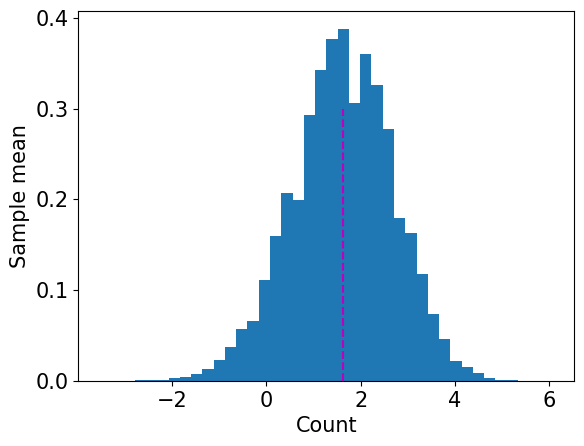

In [ ]:
n_experiments = 100_000
sampleMeans = np.zeros(n_experiments)

for i in range(n_experiments):
  sample = np.random.choice(x, size=20, replace=True)
  sampleMeans[i] = np.mean(sample)

# plot the result as a histogram
plt.hist(sampleMeans, bins = 40, density= True)
plt.plot([popmean, popmean], [0, 0.3], 'm--')
plt.xlabel('Count')
plt.ylabel('Sample mean')
plt.show()

5.25 Reproducible randomness via seeding

In [ ]:
import numpy as np
import torch

In [ ]:
np.random.randn(5)

array([-0.99752073, -0.73797239,  0.93185343, -0.62369609, -0.58648864])

In [ ]:
np.random.seed(17) # an old method to set seed
np.random.randn(5)

array([ 0.27626589, -1.85462808,  0.62390111,  1.14531129,  1.03719047])

In [ ]:
# new numpy method to set random seed
randseed1 = np.random.RandomState(17)
randseed2 = np.random.RandomState(20210530)

print(randseed1.randn(5))
print(randseed2.randn(5))
print(randseed1.randn(5))
print(randseed2.randn(5))
print(np.random.randn(5))


[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
[ 0.13126776 -1.21256024  0.15999085 -0.75522304  0.34989599]


In [ ]:
# now in torch
print(torch.randn(5))
# torch seed is like numpy old way
torch.manual_seed(17)
print(torch.randn(5))


# torch's seed does not spead to numpy
print(np.random.randn(5))

randseed1 = np.random.RandomState(17)
print(randseed1.randn(5))


# tensor([-0.6124, -1.1835, -1.4831,  1.8004,  0.0096])
# tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])
# [ 0.0991466   0.63792617  0.70311068 -0.91609315 -0.78601423]
# [ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]

tensor([-0.6124, -1.1835, -1.4831,  1.8004,  0.0096])
tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])
[ 1.1191818  -0.98339611  0.24452002 -0.58140974  0.4295639 ]
[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]


In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

5.26 t-test

In [ ]:
# using scipy
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# parameters
n1 = 300 # sample in dataset 1
n2 = 400
mu1 = 1
mu2 = 1.2

data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

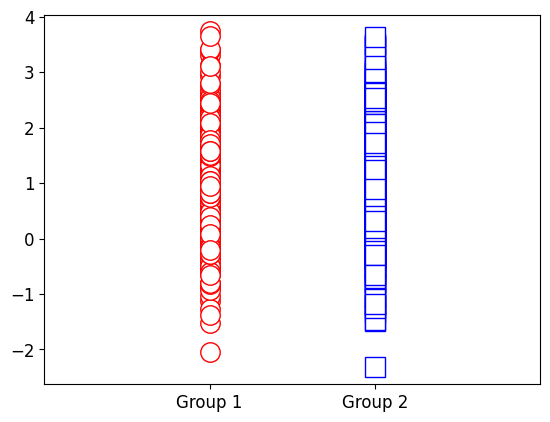

In [ ]:
# plot them, whether the mean of the two groups differ from each other
plt.plot(np.zeros(n1), data1, 'ro', markerfacecolor = 'w', markersize = 14)
plt.plot(np.ones(n2), data2, 'bs', markerfacecolor = 'w', markersize = 14)
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Group 1', 'Group 2'])
plt.show()

In [ ]:
# t-test via stats package
t, p = stats.ttest_ind(data1, data2) # _ind means independent samples
t, p, np.mean(data1) - np.mean(data2)


(-1.1968224836862649, 0.2317820846217071, -0.0913550638773184)

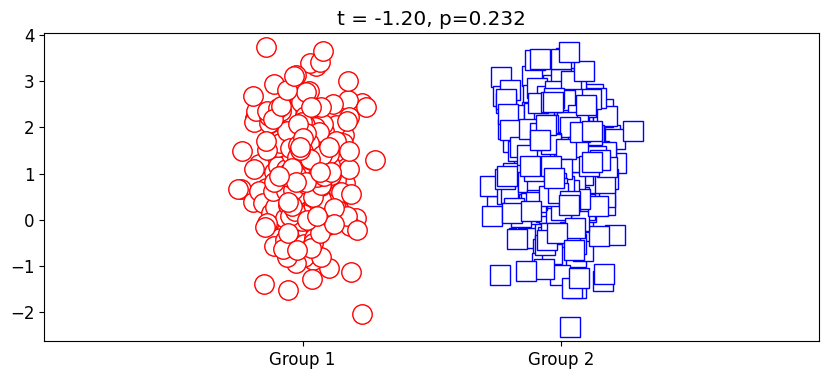

In [ ]:
# common way to show t-test result in a plot
fig = plt.figure(figsize = (10, 4))
plt.rcParams.update({'font.size':12}) # change the font size

plt.plot(0+np.random.randn(n1)/10, data1, 'ro', markerfacecolor = 'w', markersize = 14)
plt.plot(1+np.random.randn(n2)/10, data2, 'bs', markerfacecolor = 'w', markersize = 14)
plt.xlim([-1, 2])
plt.xticks([0, 1], labels=['Group 1', 'Group 2'])
plt.title(f't = {t:.2f}, p={p:.3f}')
plt.show()

5.27 Derivatives

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# sympy = symbolic math in python
import sympy as sym
import sympy.plotting.plot as symplot

In [ ]:
# create symbolic variables in sympy
x = sym.symbols('x')

# create a function
fx = 2*x**2

# compute its derivative
df = sym.diff(fx, x)

print(fx)
print(df)

2*x**2
4*x


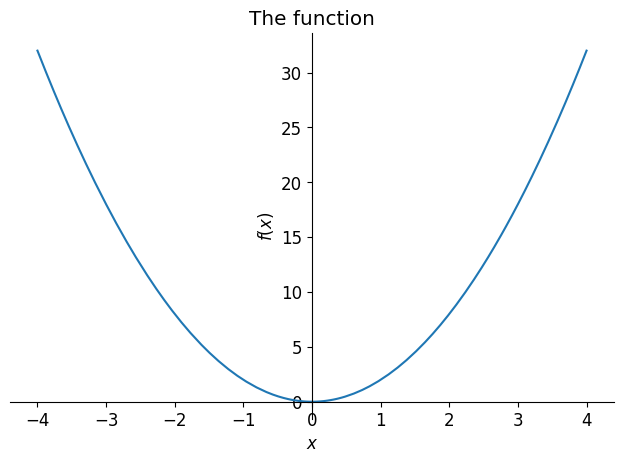

In [ ]:
# plot them
symplot(fx, (x, -4, 4), title = 'The function')
plt.show()

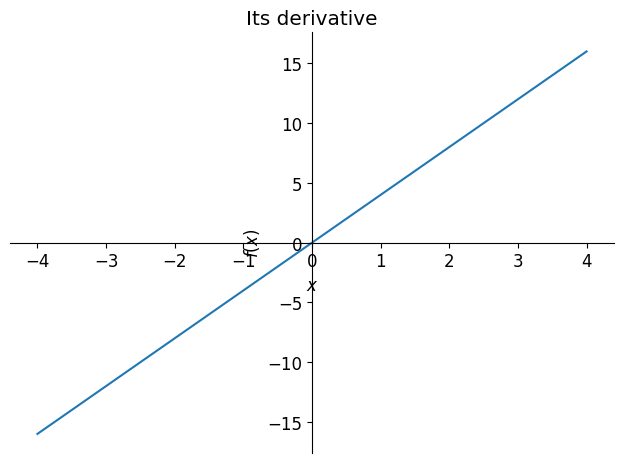

In [ ]:
symplot(df, (x, -4, 4), title = 'Its derivative')
plt.show()

In [ ]:
# repleat with relu and sigmoid

# create symbolic functions
relu = sym.Max(0, x)
sigmoid = 1 / (1 + sym.exp(-x))

In [ ]:
print(relu)
print(sigmoid)

Max(0, x)
1/(1 + exp(-x))


In [ ]:
sigmoid

1/(1 + exp(-x))

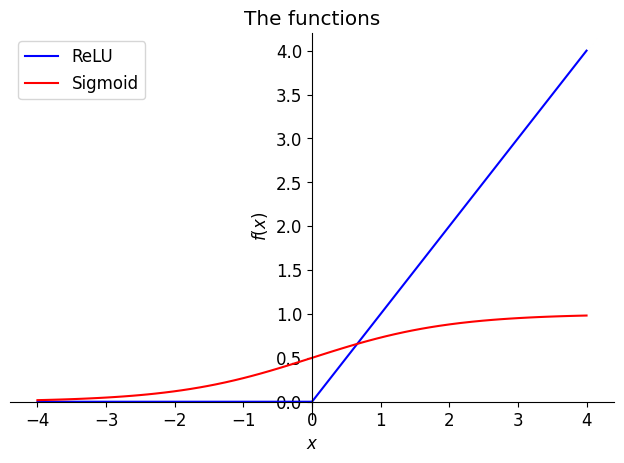

In [ ]:
# graph the functions
p = symplot(relu, (x, -4, 4), label = 'ReLU', show = False, line_color = 'blue')
p.extend(symplot(sigmoid, (x, -4, 4), label = 'Sigmoid', show = False, line_color = 'red'))
p.legend = True
p.title = 'The functions'
p.show()

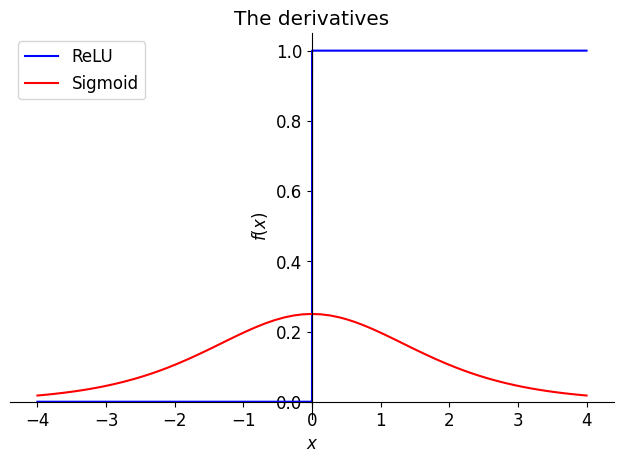

In [ ]:
# graph their derivatives
p = symplot(sym.diff(relu), (x, -4, 4), label = 'ReLU', show = False, line_color = 'blue')
p.extend(symplot(sym.diff(sigmoid), (x, -4, 4), label = 'Sigmoid', show = False, line_color = 'red'))
p.legend = True
p.title = 'The derivatives'
p.show()

5.29 Derivatives: product and chain rules

In [ ]:
import numpy as np
import sympy as sym
from IPython.display import display

In [ ]:
# create symbolic variables in sympy
x = sym.symbols('x')

# create two functions
fx = 2*x**2
gx = 4*x**3 - 3*x**4

#compute their individual derivatives
df = sym.diff(fx)
dg = sym.diff(gx)

In [ ]:
# manually apply the product rule of derivative
manual = df * gx + fx *dg
manual

2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

In [ ]:
# via sympy
viasympy = sym.diff(fx*gx)
viasympy

2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

In [ ]:
# chain rule
gx = x ** 2 + 4 * x ** 3
fx = (gx) ** 5

# manual apply
# change rule itself: df(f(g(x))) / dx = f'(g(x))*g'(x)
dfx = 5*(gx)**4*sym.diff(gx)
dfx


5*(12*x**2 + 2*x)*(4*x**3 + x**2)**4

In [ ]:
# using sympy
sym.diff(fx)

(60*x**2 + 10*x)*(4*x**3 + x**2)**4